<a href="https://colab.research.google.com/github/joshitha026/AIML-INTERNSHIP/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383

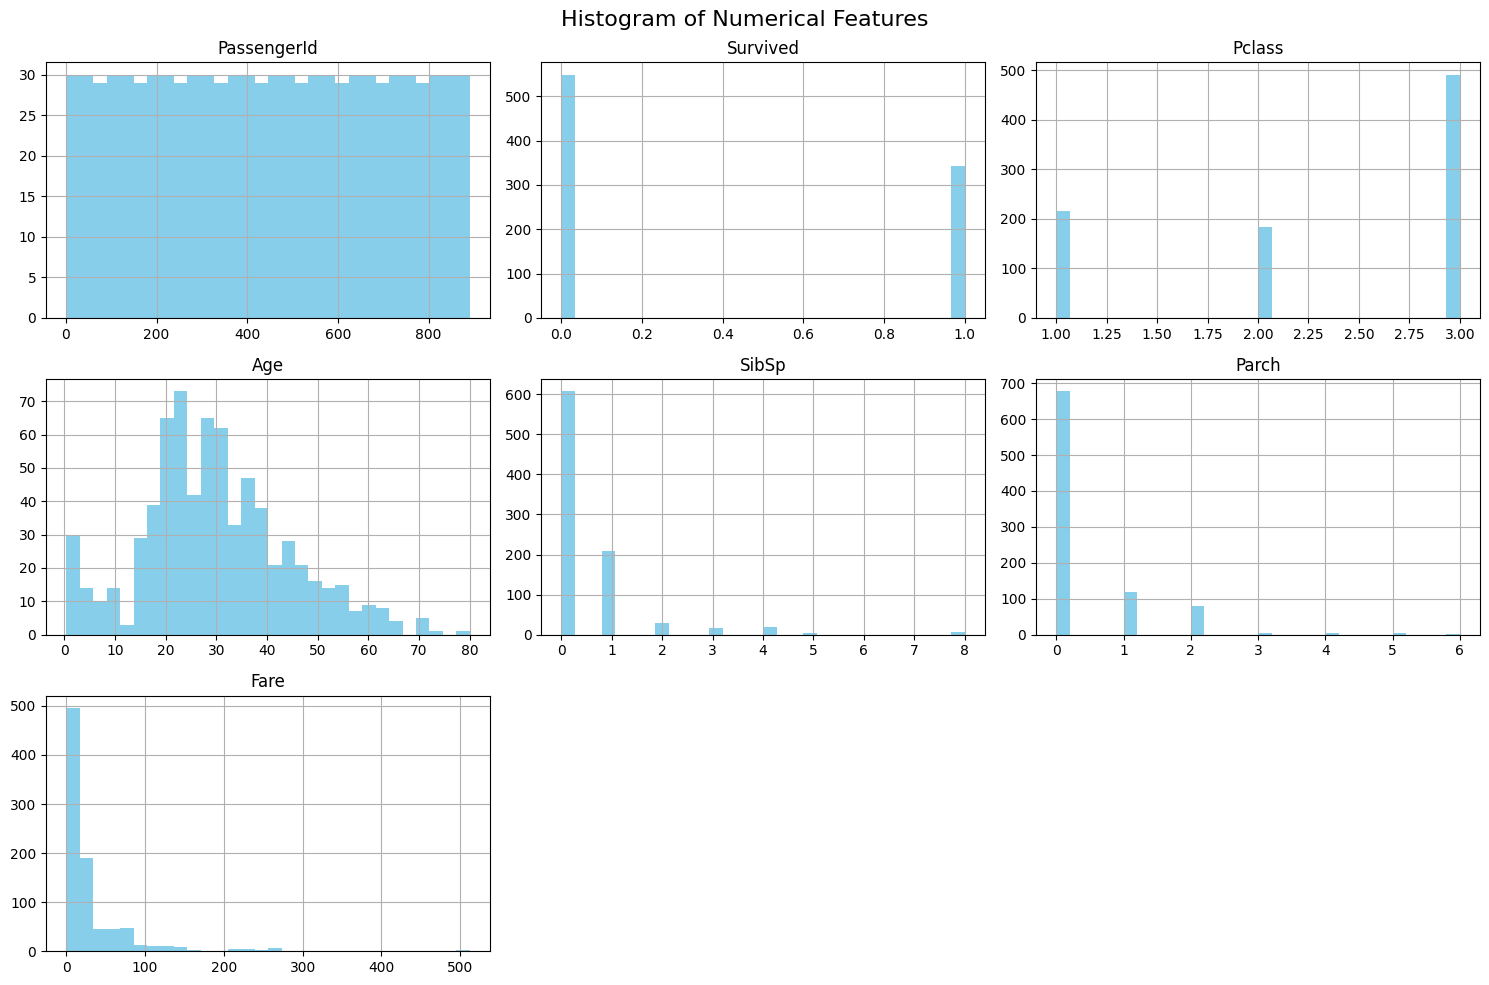

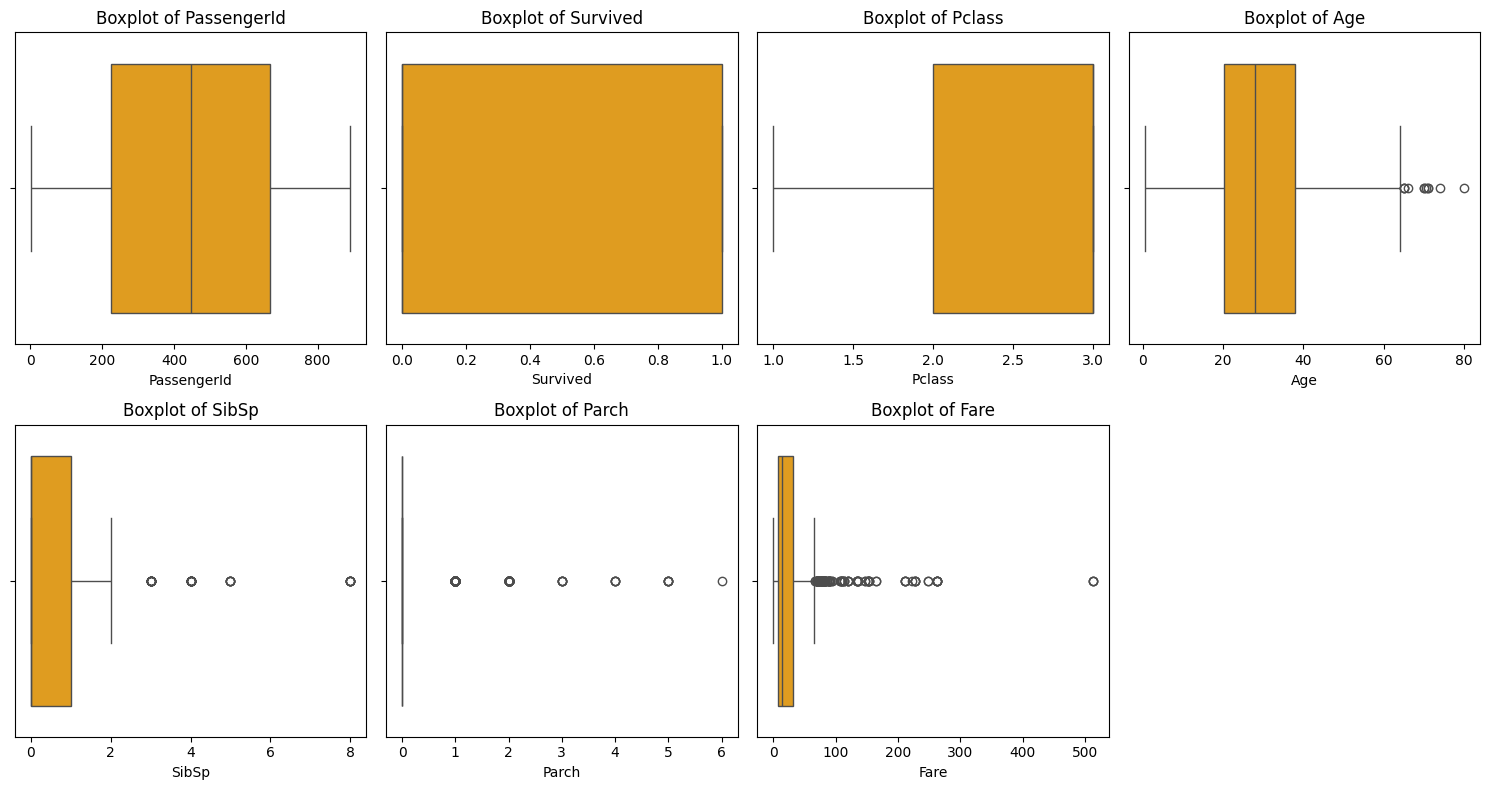

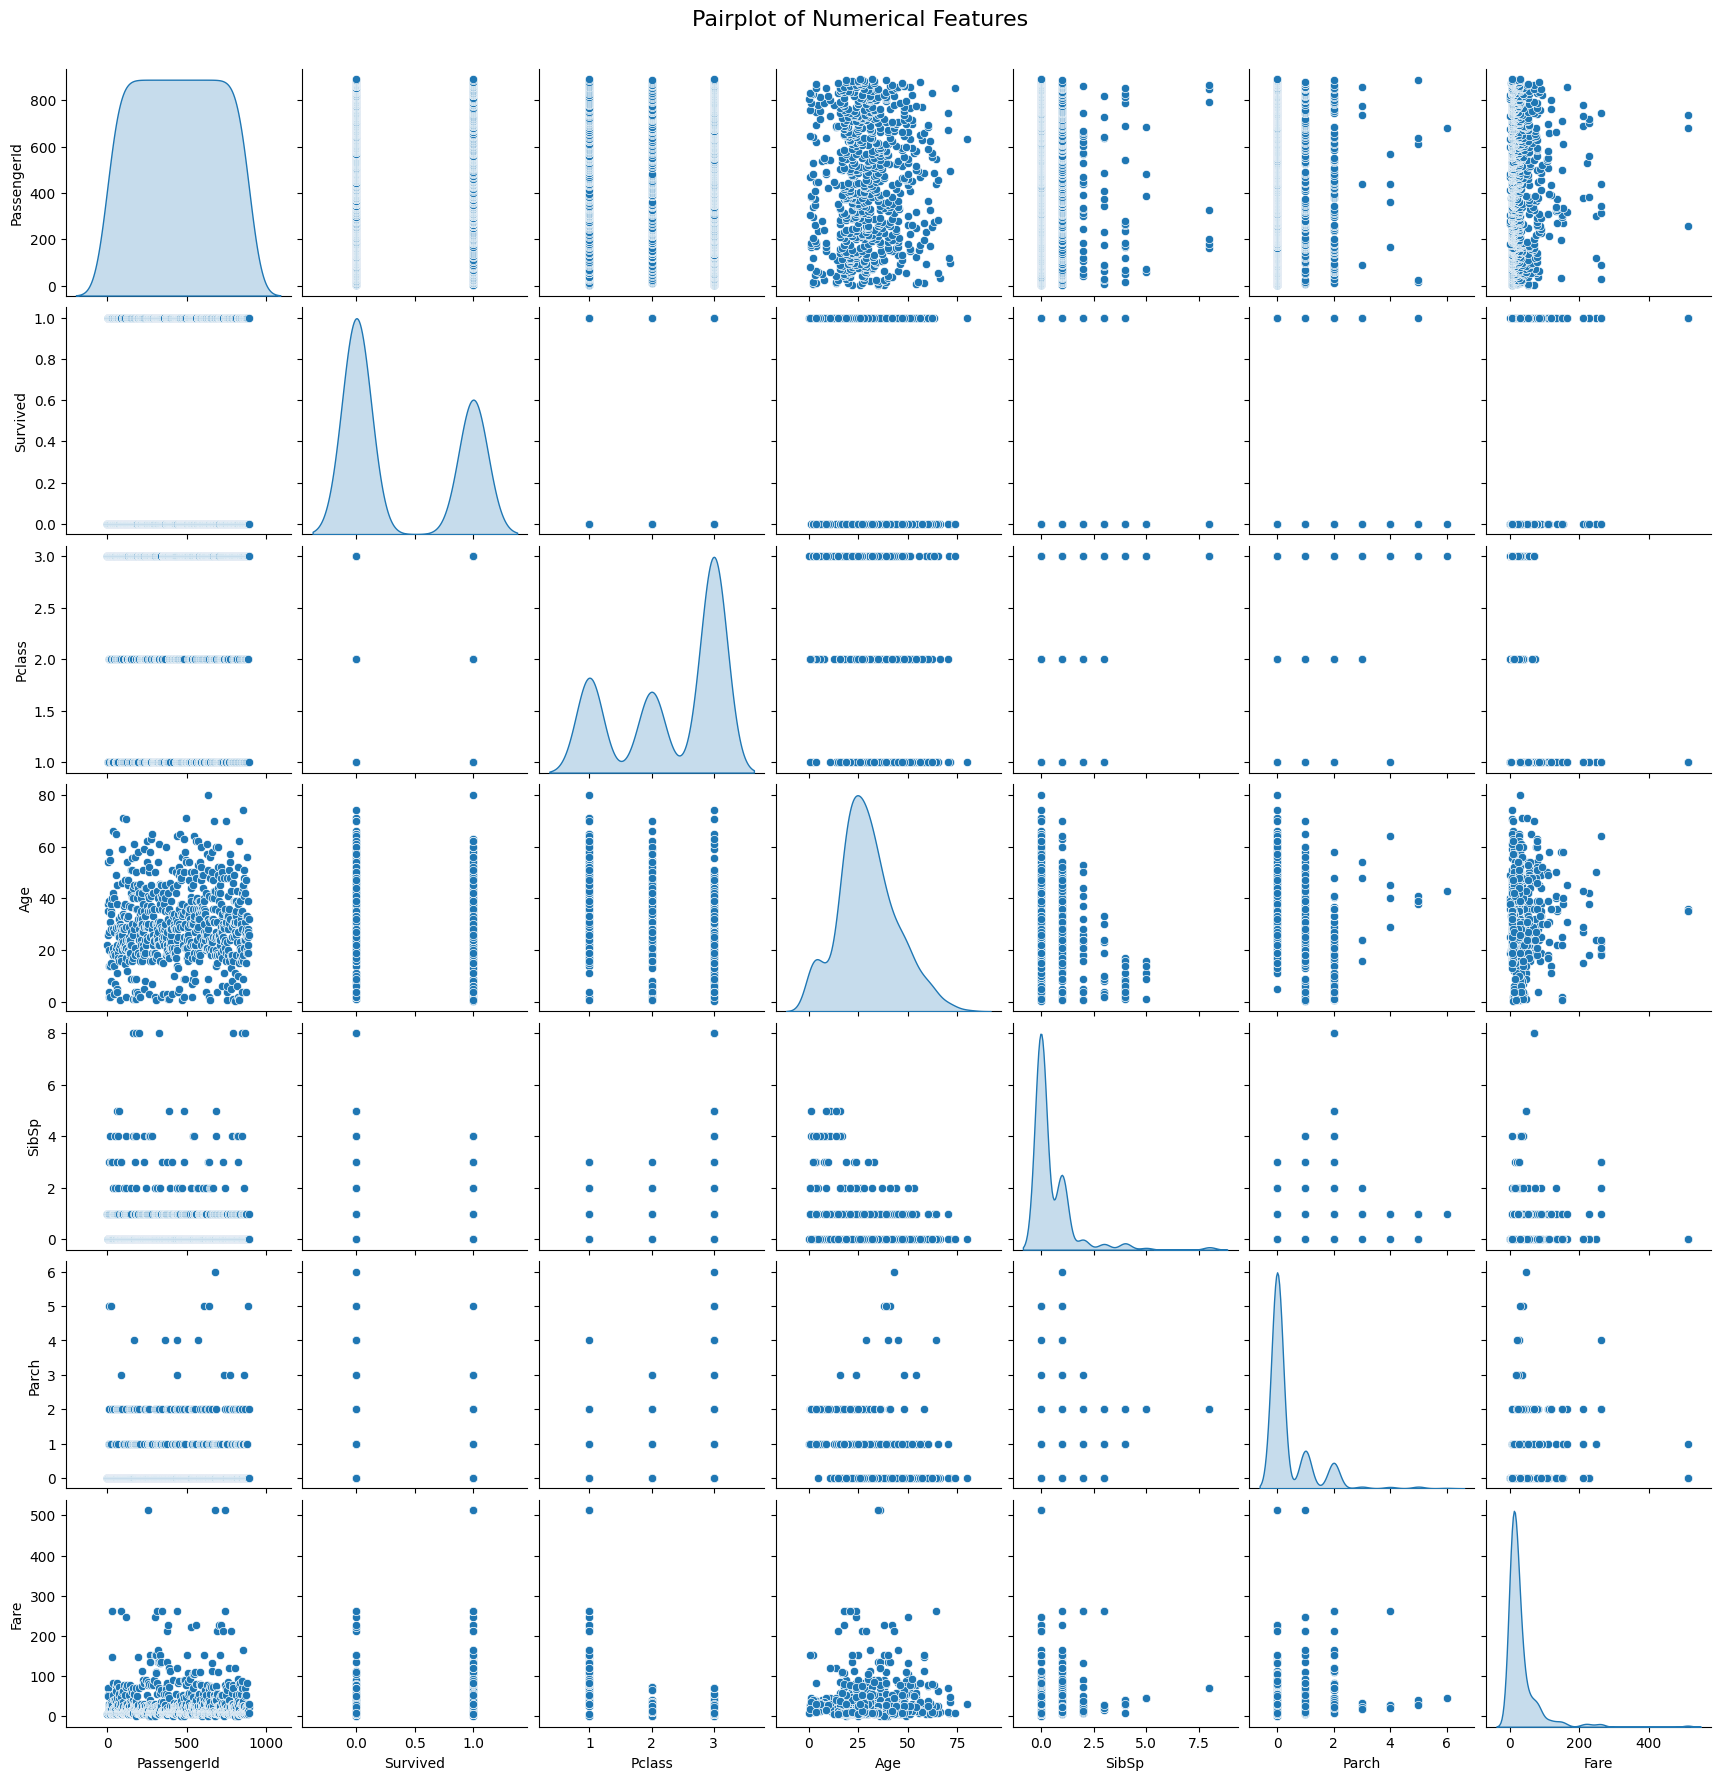

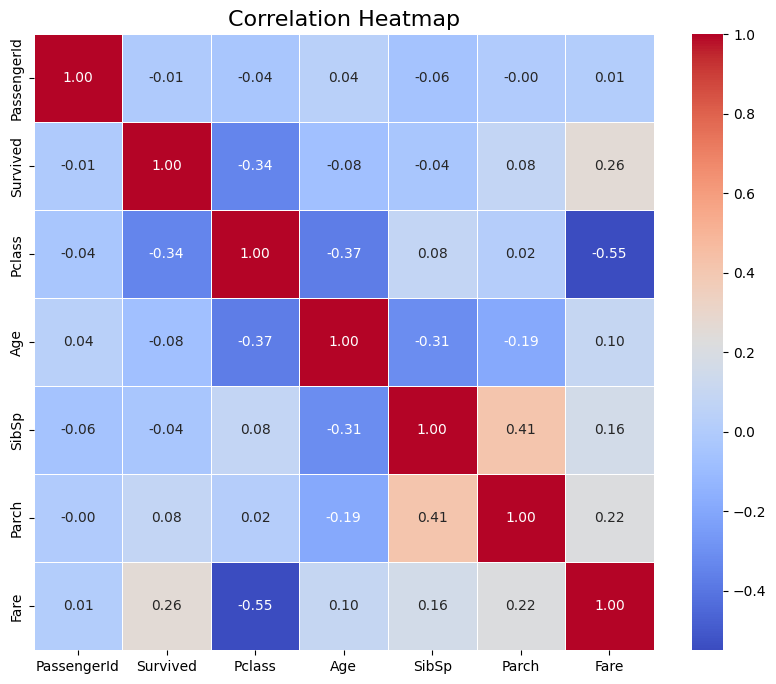

Suggested Insights:
- Check outliers from boxplots for potential data cleaning.
- Skewed distributions may require transformation.
- Correlated features could be reduced using PCA or removed to avoid multicollinearity.
- Patterns and clusters in pairplot/scatter matrix may guide feature engineering.


In [2]:
!pip install plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from google.colab import files
uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

print(df.info())
print(df.describe().T)
print(df.isnull().sum())

df.select_dtypes(include='number').hist(bins=30, figsize=(15, 10), color='skyblue')
plt.suptitle("Histogram of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

num_cols = df.select_dtypes(include='number').columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, (len(num_cols) + 1) // 2, i + 1)
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

sns.pairplot(df.select_dtypes(include='number'), diag_kind='kde')
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=16)
plt.show()

plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

fig = px.scatter_matrix(df,
                        dimensions=num_cols,
                        title="Interactive Scatter Matrix",
                        height=800)
fig.show()

print("Suggested Insights:")
print("- Check outliers from boxplots for potential data cleaning.")
print("- Skewed distributions may require transformation.")
print("- Correlated features could be reduced using PCA or removed to avoid multicollinearity.")
print("- Patterns and clusters in pairplot/scatter matrix may guide feature engineering.")
